In [53]:
#libraries

import pandas as pd
import numpy as np
import seaborn as sns
import matplotlib.pyplot as plt
%matplotlib inline
from sklearn.model_selection import train_test_split
from sklearn.linear_model import LinearRegression
from sklearn.linear_model import Ridge, RidgeCV, Lasso
from sklearn.preprocessing import StandardScaler
from sklearn.preprocessing import MinMaxScaler
from sklearn.metrics import mean_absolute_error, mean_squared_error, r2_score

In [76]:
path = r"C:\Users\Admin\Downloads\ENB2012.csv"
df1 = pd.read_csv(path)
df2 = pd.read_csv(r'C:\Users\Admin\Downloads\energydata_complete.csv')

In [77]:
from IPython.core.interactiveshell import InteractiveShell
InteractiveShell.ast_node_interactivity = "all"

In [78]:
df1.head()
df2.head()

,X1,X2,X3,X4,X5,X6,X7,X8,Y1,Y2
0,0.98,514.5,294.0,110.25,7.0,2,0.0,0,15.55,21.33
1,0.98,514.5,294.0,110.25,7.0,3,0.0,0,15.55,21.33
2,0.98,514.5,294.0,110.25,7.0,4,0.0,0,15.55,21.33
3,0.98,514.5,294.0,110.25,7.0,5,0.0,0,15.55,21.33
4,0.90,563.5,318.5,122.50,7.0,2,0.0,0,20.84,28.28


,date,Appliances,lights,T1,RH_1,T2,RH_2,T3,RH_3,T4,...,T9,RH_9,T_out,Press_mm_hg,RH_out,Windspeed,Visibility,Tdewpoint,rv1,rv2
0,2016-01-11 17:00:00,60,30,19.89,47.596667,19.2,44.790000,19.79,44.730000,19.000000,...,17.033333,45.53,6.600000,733.5,92.0,7.000000,63.000000,5.3,13.275433,13.275433
1,2016-01-11 17:10:00,60,30,19.89,46.693333,19.2,44.722500,19.79,44.790000,19.000000,...,17.066667,45.56,6.483333,733.6,92.0,6.666667,59.166667,5.2,18.606195,18.606195
2,2016-01-11 17:20:00,50,30,19.89,46.300000,19.2,44.626667,19.79,44.933333,18.926667,...,17.000000,45.50,6.366667,733.7,92.0,6.333333,55.333333,5.1,28.642668,28.642668
3,2016-01-11 17:30:00,50,40,19.89,46.066667,19.2,44.590000,19.79,45.000000,18.890000,...,17.000000,45.40,6.250000,733.8,92.0,6.000000,51.500000,5.0,45.410389,45.410389
4,2016-01-11 17:40:00,60,40,19.89,46.333333,19.2,44.530000,19.79,45.000000,18.890000,...,17.000000,45.40,6.133333,733.9,92.0,5.666667,47.666667,4.9,10.084097,10.084097


In [79]:
list(df1.columns)
list(df2.columns)

['X1', 'X2', 'X3', 'X4', 'X5', 'X6', 'X7', 'X8', 'Y1', 'Y2']

['date',
 'Appliances',
 'lights',
 'T1',
 'RH_1',
 'T2',
 'RH_2',
 'T3',
 'RH_3',
 'T4',
 'RH_4',
 'T5',
 'RH_5',
 'T6',
 'RH_6',
 'T7',
 'RH_7',
 'T8',
 'RH_8',
 'T9',
 'RH_9',
 'T_out',
 'Press_mm_hg',
 'RH_out',
 'Windspeed',
 'Visibility',
 'Tdewpoint',
 'rv1',
 'rv2']

In [80]:
# new_col = ['Relative_Compactness','Surface_Area',
# 'Wall_Area','Roof_Area', 'Overall_Height',
# 'Orientation','Glazing_Area',
# 'Glazing_Area_Distribution',
# 'Heating_Load','Cooling_Load']
# col_new_names = {}
# for col in list(df.columns):
#     for item in new_col:
#         col_new_names[col] = item

In [81]:
renamed_columns = {'Appliances': 'Appliances_energy', \
                   'T1': 'Kitchen_temp', 'RH_1': 'Kitchen_humidity', \
                   'T2': 'Livingroom_temp', 'RH_2': 'Livingroom_humidity', \
                   'T3': 'Laundryroom_temp', 'RH_3': 'Laundryroom_humidity', \
                   'T4': 'Officeroom_temp', 'RH_4': 'Officeroom_humidity', \
                   'T5': 'Bathroom_temp', 'RH_5': 'Bathroom_humidity', \
                   'T6': 'Northside_temp', 'RH_6': 'Northside_humidity', \
                   'T7': 'Ironingroom_temp', 'RH_7': 'Ironingroom_humidity', \
                   'T8': 'Teenager_room_temp', 'RH_8': 'Teenager_room_humidity', \
                   'T9': 'Parents_room_temp', 'RH_9': 'Parents_room_humidity', \
                   'T_out': 'Weather_station_temp', 'Press_mm_hg': 'Weather_station_pressure', \
                   'RH_out': 'Weather_station_humidity','Tdewpoint': 'Weather_station_dewpoint'}
df2.rename(columns = renamed_columns, inplace = True)

In [82]:
# # Renaming Columns

# column_names = {'X1':'Relative_Compactness', 'X2': 'Surface_Area',
# 'X3': 'Wall_Area', 'X4': 'Roof_Area', 'X5': 'Overall_Height',
# 'X6': 'Orientation', 'X7': 'Glazing_Area',
# 'X8': 'Glazing_Area_Distribution',
# 'Y1': 'Heating_Load', 'Y2': 'Cooling_Load'}

In [83]:
df2.head()

,date,Appliances_energy,lights,Kitchen_temp,Kitchen_humidity,Livingroom_temp,Livingroom_humidity,Laundryroom_temp,Laundryroom_humidity,Officeroom_temp,...,Parents_room_temp,Parents_room_humidity,Weather_station_temp,Weather_station_pressure,Weather_station_humidity,Windspeed,Visibility,Weather_station_dewpoint,rv1,rv2
0,2016-01-11 17:00:00,60,30,19.89,47.596667,19.2,44.790000,19.79,44.730000,19.000000,...,17.033333,45.53,6.600000,733.5,92.0,7.000000,63.000000,5.3,13.275433,13.275433
1,2016-01-11 17:10:00,60,30,19.89,46.693333,19.2,44.722500,19.79,44.790000,19.000000,...,17.066667,45.56,6.483333,733.6,92.0,6.666667,59.166667,5.2,18.606195,18.606195
2,2016-01-11 17:20:00,50,30,19.89,46.300000,19.2,44.626667,19.79,44.933333,18.926667,...,17.000000,45.50,6.366667,733.7,92.0,6.333333,55.333333,5.1,28.642668,28.642668
3,2016-01-11 17:30:00,50,40,19.89,46.066667,19.2,44.590000,19.79,45.000000,18.890000,...,17.000000,45.40,6.250000,733.8,92.0,6.000000,51.500000,5.0,45.410389,45.410389
4,2016-01-11 17:40:00,60,40,19.89,46.333333,19.2,44.530000,19.79,45.000000,18.890000,...,17.000000,45.40,6.133333,733.9,92.0,5.666667,47.666667,4.9,10.084097,10.084097


In [84]:
# For consistency, let's make all the column names lower case

df2.columns = [x.lower() for x in df2.columns]

df2.columns

Index(['date', 'appliances_energy', 'lights', 'kitchen_temp',
       'kitchen_humidity', 'livingroom_temp', 'livingroom_humidity',
       'laundryroom_temp', 'laundryroom_humidity', 'officeroom_temp',
       'officeroom_humidity', 'bathroom_temp', 'bathroom_humidity',
       'northside_temp', 'northside_humidity', 'ironingroom_temp',
       'ironingroom_humidity', 'teenager_room_temp', 'teenager_room_humidity',
       'parents_room_temp', 'parents_room_humidity', 'weather_station_temp',
       'weather_station_pressure', 'weather_station_humidity', 'windspeed',
       'visibility', 'weather_station_dewpoint', 'rv1', 'rv2'],
      dtype='object')

In [85]:
# Check the datatypes count of the dataset

df2.dtypes.value_counts()

float64    26
int64       2
object      1
Name: count, dtype: int64

In [86]:
# get a general intuition about the dataset
df2.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 19735 entries, 0 to 19734
Data columns (total 29 columns):
 #   Column                    Non-Null Count  Dtype  
---  ------                    --------------  -----  
 0   date                      19735 non-null  object 
 1   appliances_energy         19735 non-null  int64  
 2   lights                    19735 non-null  int64  
 3   kitchen_temp              19735 non-null  float64
 4   kitchen_humidity          19735 non-null  float64
 5   livingroom_temp           19735 non-null  float64
 6   livingroom_humidity       19735 non-null  float64
 7   laundryroom_temp          19735 non-null  float64
 8   laundryroom_humidity      19735 non-null  float64
 9   officeroom_temp           19735 non-null  float64
 10  officeroom_humidity       19735 non-null  float64
 11  bathroom_temp             19735 non-null  float64
 12  bathroom_humidity         19735 non-null  float64
 13  northside_temp            19735 non-null  float64
 14  norths

In [87]:
# Check for duplicate entries
df2.duplicated().sum()

0

In [88]:
# Check for empty null entries

df2.isnull().sum()

date                        0
appliances_energy           0
lights                      0
kitchen_temp                0
kitchen_humidity            0
livingroom_temp             0
livingroom_humidity         0
laundryroom_temp            0
laundryroom_humidity        0
officeroom_temp             0
officeroom_humidity         0
bathroom_temp               0
bathroom_humidity           0
northside_temp              0
northside_humidity          0
ironingroom_temp            0
ironingroom_humidity        0
teenager_room_temp          0
teenager_room_humidity      0
parents_room_temp           0
parents_room_humidity       0
weather_station_temp        0
weather_station_pressure    0
weather_station_humidity    0
windspeed                   0
visibility                  0
weather_station_dewpoint    0
rv1                         0
rv2                         0
dtype: int64

In [89]:
# get the number of unique values per column
df2.apply(lambda x: len(x.unique()))
# df.appliances_energy.nunique()

date                        19735
appliances_energy              92
lights                          8
kitchen_temp                  722
kitchen_humidity             2547
livingroom_temp              1650
livingroom_humidity          3376
laundryroom_temp             1426
laundryroom_humidity         2618
officeroom_temp              1390
officeroom_humidity          2987
bathroom_temp                2263
bathroom_humidity            7571
northside_temp               4446
northside_humidity           9709
ironingroom_temp             1955
ironingroom_humidity         5891
teenager_room_temp           2228
teenager_room_humidity       6649
parents_room_temp             924
parents_room_humidity        3388
weather_station_temp         1730
weather_station_pressure     2189
weather_station_humidity      566
windspeed                     189
visibility                    413
weather_station_dewpoint     1409
rv1                         19735
rv2                         19735
dtype: int64

In [90]:
# Change the date column to date time
df2.date = pd.to_datetime(df2.date)

In [91]:
# # Extract the different parts of the date from the date column
# df2['month'] = df2.date.dt.month
# df2['weekday'] = df2.date.dt.weekday
# df2['hour'] = df2.date.dt.hour
# df2['week'] = df2.date.dt.isocalendar().week

In [92]:
df2.sample(3)

,date,appliances_energy,lights,kitchen_temp,kitchen_humidity,livingroom_temp,livingroom_humidity,laundryroom_temp,laundryroom_humidity,officeroom_temp,...,parents_room_temp,parents_room_humidity,weather_station_temp,weather_station_pressure,weather_station_humidity,windspeed,visibility,weather_station_dewpoint,rv1,rv2
7024,2016-02-29 11:40:00,140,0,19.39,34.433333,18.963333,32.030000,20.500000,35.633333,19.100000,...,18.2,39.790000,4.233333,762.866667,57.333333,7.000000,31.333333,-3.533333,11.053899,11.053899
4692,2016-02-13 07:00:00,50,0,20.29,38.290000,18.260000,39.663333,21.000000,40.163333,18.700000,...,18.5,43.090000,1.700000,738.700000,87.000000,2.000000,24.000000,-0.300000,26.168695,26.168695
7295,2016-03-02 08:50:00,70,20,20.00,40.163333,18.500000,40.760000,20.533333,38.590000,21.263333,...,18.1,41.363333,4.833333,746.650000,86.333333,5.666667,40.000000,2.700000,2.575480,2.575480


In [93]:
# Apply the describe method to the dataset to get a deeper intuition about it

df2.describe().T

,count,mean,min,25%,50%,75%,max,std
date,19735,2016-03-20 05:30:00,2016-01-11 17:00:00,2016-02-14 23:15:00,2016-03-20 05:30:00,2016-04-23 11:45:00,2016-05-27 18:00:00,NaN
appliances_energy,19735.0,97.694958,10.0,50.0,60.0,100.0,1080.0,102.524891
lights,19735.0,3.801875,0.0,0.0,0.0,0.0,70.0,7.935988
kitchen_temp,19735.0,21.686571,16.79,20.76,21.6,22.6,26.26,1.606066
kitchen_humidity,19735.0,40.259739,27.023333,37.333333,39.656667,43.066667,63.36,3.979299
livingroom_temp,19735.0,20.341219,16.1,18.79,20.0,21.5,29.856667,2.192974
livingroom_humidity,19735.0,40.42042,20.463333,37.9,40.5,43.26,56.026667,4.069813
laundryroom_temp,19735.0,22.267611,17.2,20.79,22.1,23.29,29.236,2.006111
laundryroom_humidity,19735.0,39.2425,28.766667,36.9,38.53,41.76,50.163333,3.254576
officeroom_temp,19735.0,20.855335,15.1,19.53,20.666667,22.1,26.2,2.042884


In [94]:
# Lets get an intuition of how the attributes are correalted
df2.corr()

,date,appliances_energy,lights,kitchen_temp,kitchen_humidity,livingroom_temp,livingroom_humidity,laundryroom_temp,laundryroom_humidity,officeroom_temp,...,parents_room_temp,parents_room_humidity,weather_station_temp,weather_station_pressure,weather_station_humidity,windspeed,visibility,weather_station_dewpoint,rv1,rv2
date,1.000000,-0.009630,-0.189835,0.696974,-0.102760,0.515321,-0.092945,0.792938,-0.431939,0.781954,...,0.888546,-0.244647,0.588861,-0.026770,-0.336362,-0.257415,-0.096214,0.468731,0.000277,0.000277
appliances_energy,-0.009630,1.000000,0.197278,0.055447,0.086031,0.120073,-0.060465,0.085060,0.036292,0.040281,...,0.010010,-0.051462,0.099155,-0.034885,-0.152282,0.087122,0.000230,0.015353,-0.011145,-0.011145
lights,-0.189835,0.197278,1.000000,-0.023528,0.106968,-0.005622,0.050985,-0.097393,0.131161,-0.008859,...,-0.157592,-0.008766,-0.074424,-0.010576,0.068543,0.060281,0.020038,-0.036322,0.000521,0.000521
kitchen_temp,0.696974,0.055447,-0.023528,1.000000,0.164006,0.836834,-0.002509,0.892402,-0.028550,0.877001,...,0.844777,0.071756,0.682846,-0.150574,-0.345481,-0.087654,-0.076210,0.571309,-0.006203,-0.006203
kitchen_humidity,-0.102760,0.086031,0.106968,0.164006,1.000000,0.269839,0.797535,0.253230,0.844677,0.106180,...,0.115263,0.764001,0.340767,-0.293957,0.274126,0.204932,-0.021057,0.639106,-0.000699,-0.000699
livingroom_temp,0.515321,0.120073,-0.005622,0.836834,0.269839,1.000000,-0.165610,0.735245,0.121497,0.762066,...,0.675535,0.157346,0.792255,-0.133028,-0.505291,0.052495,-0.069721,0.582602,-0.011087,-0.011087
livingroom_humidity,-0.092945,-0.060465,0.050985,-0.002509,0.797535,-0.165610,1.000000,0.137319,0.678326,-0.047304,...,0.054544,0.676467,0.033674,-0.255646,0.584911,0.069190,-0.005368,0.499152,0.006275,0.006275
laundryroom_temp,0.792938,0.085060,-0.097393,0.892402,0.253230,0.735245,0.137319,1.000000,-0.011234,0.852778,...,0.901324,0.134602,0.699417,-0.189974,-0.281718,-0.100776,-0.102310,0.645886,-0.005194,-0.005194
laundryroom_humidity,-0.431939,0.036292,0.131161,-0.028550,0.844677,0.121497,0.678326,-0.011234,1.000000,-0.140457,...,-0.195270,0.833538,0.118207,-0.233274,0.356192,0.263188,0.017041,0.414387,-0.000477,-0.000477
officeroom_temp,0.781954,0.040281,-0.008859,0.877001,0.106180,0.762066,-0.047304,0.852778,-0.140457,1.000000,...,0.889439,-0.025549,0.663478,-0.075292,-0.388602,-0.185747,-0.104768,0.519471,-0.001815,-0.001815


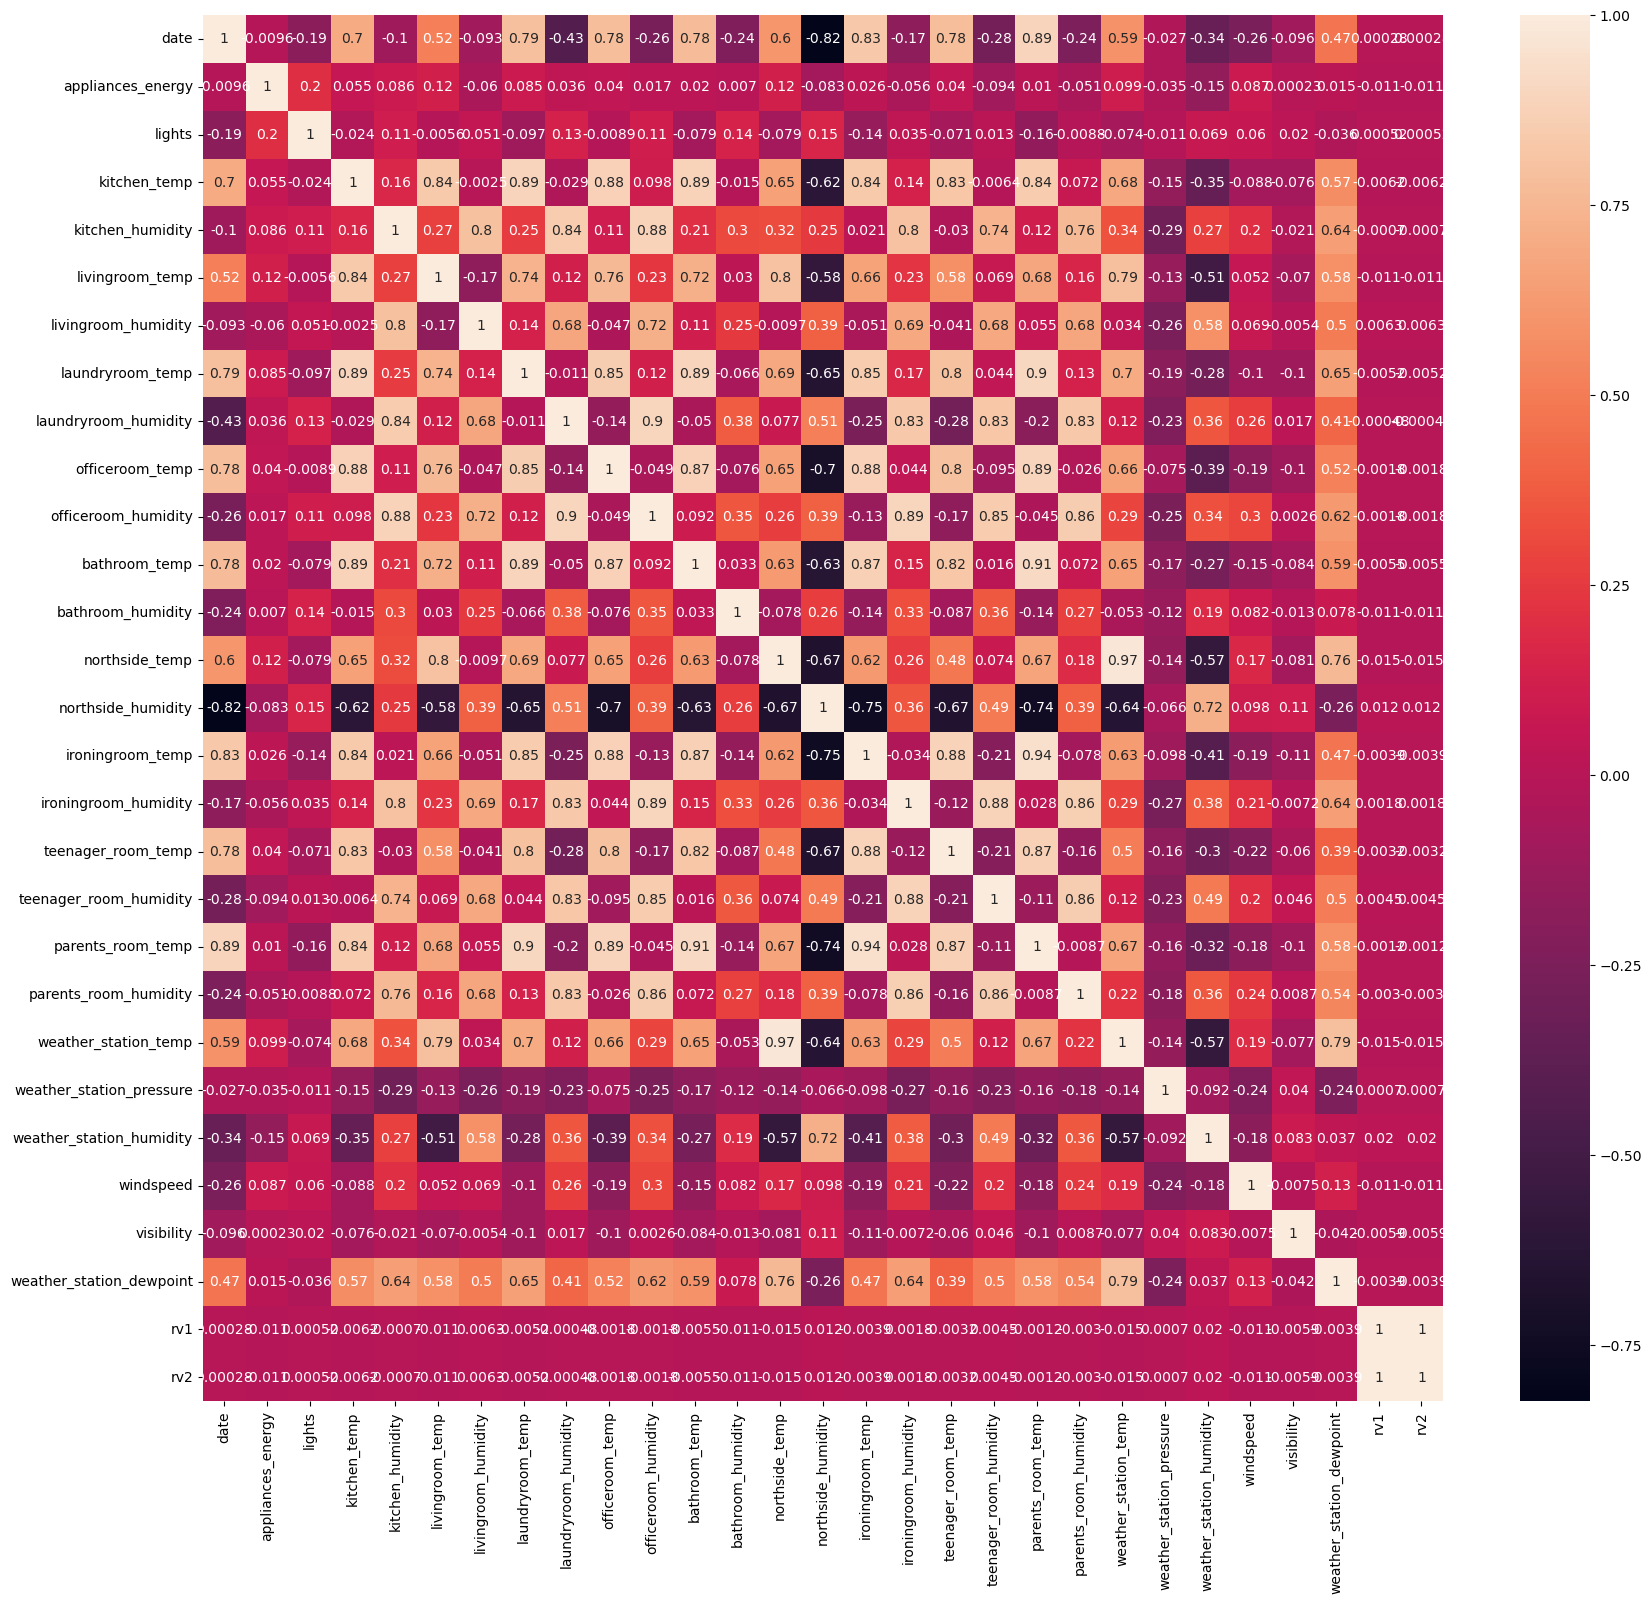

In [95]:
fig = plt.figure(figsize=(20, 18))
sns.heatmap(df2.corr(), annot = True, cbar = True);

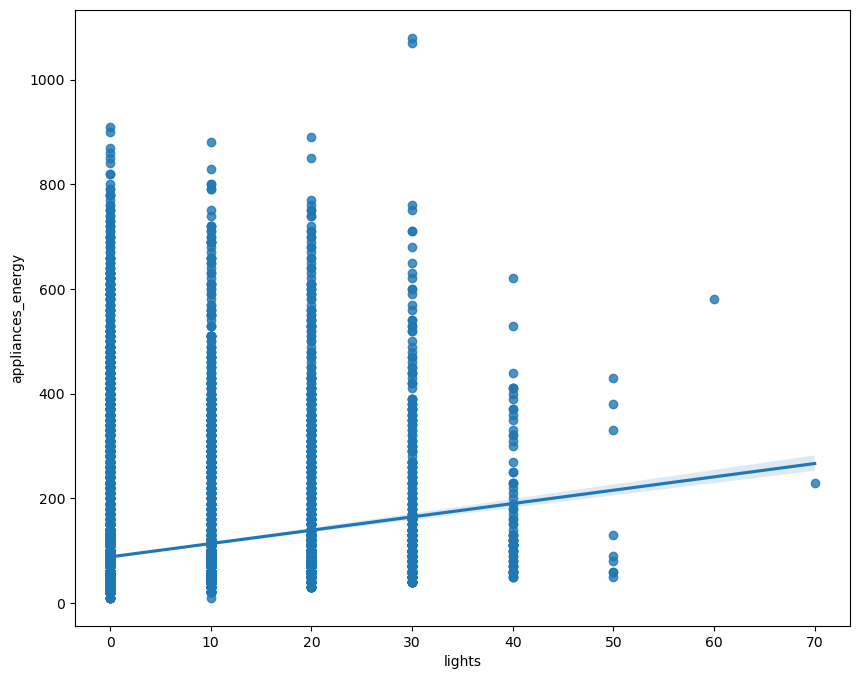

In [96]:
fig = plt.figure(figsize=(10, 8))
sns.regplot(data = df2, y = df2.appliances_energy, x = df2.lights);

In [29]:
feature_cols = [column for column in df2.columns if column != 'appliances_energy']
feature_cols

['lights',
 'kitchen_temp',
 'kitchen_humidity',
 'livingroom_temp',
 'livingroom_humidity',
 'laundryroom_temp',
 'laundryroom_humidity',
 'officeroom_temp',
 'officeroom_humidity',
 'bathroom_temp',
 'bathroom_humidity',
 'northside_temp',
 'northside_humidity',
 'ironingroom_temp',
 'ironingroom_humidity',
 'teenager_room_temp',
 'teenager_room_humidity',
 'parents_room_temp',
 'parents_room_humidity',
 'weather_station_temp',
 'weather_station_pressure',
 'weather_station_humidity',
 'windspeed',
 'visibility',
 'weather_station_dewpoint',
 'rv1',
 'rv2',
 'month',
 'weekday',
 'hour']

In [32]:
X = df2[feature_cols]
y = df2['appliances_energy']

In [37]:
# df2[feature_cols].values

In [33]:
X.head()
y.head()

,lights,kitchen_temp,kitchen_humidity,livingroom_temp,livingroom_humidity,laundryroom_temp,laundryroom_humidity,officeroom_temp,officeroom_humidity,bathroom_temp,...,weather_station_pressure,weather_station_humidity,windspeed,visibility,weather_station_dewpoint,rv1,rv2,month,weekday,hour
0,30,19.89,47.596667,19.2,44.790000,19.79,44.730000,19.000000,45.566667,17.166667,...,733.5,92.0,7.000000,63.000000,5.3,13.275433,13.275433,1,0,17
1,30,19.89,46.693333,19.2,44.722500,19.79,44.790000,19.000000,45.992500,17.166667,...,733.6,92.0,6.666667,59.166667,5.2,18.606195,18.606195,1,0,17
2,30,19.89,46.300000,19.2,44.626667,19.79,44.933333,18.926667,45.890000,17.166667,...,733.7,92.0,6.333333,55.333333,5.1,28.642668,28.642668,1,0,17
3,40,19.89,46.066667,19.2,44.590000,19.79,45.000000,18.890000,45.723333,17.166667,...,733.8,92.0,6.000000,51.500000,5.0,45.410389,45.410389,1,0,17
4,40,19.89,46.333333,19.2,44.530000,19.79,45.000000,18.890000,45.530000,17.200000,...,733.9,92.0,5.666667,47.666667,4.9,10.084097,10.084097,1,0,17


0    60
1    60
2    50
3    50
4    60
Name: appliances_energy, dtype: int64

In [38]:
df2.columns

Index(['appliances_energy', 'lights', 'kitchen_temp', 'kitchen_humidity',
       'livingroom_temp', 'livingroom_humidity', 'laundryroom_temp',
       'laundryroom_humidity', 'officeroom_temp', 'officeroom_humidity',
       'bathroom_temp', 'bathroom_humidity', 'northside_temp',
       'northside_humidity', 'ironingroom_temp', 'ironingroom_humidity',
       'teenager_room_temp', 'teenager_room_humidity', 'parents_room_temp',
       'parents_room_humidity', 'weather_station_temp',
       'weather_station_pressure', 'weather_station_humidity', 'windspeed',
       'visibility', 'weather_station_dewpoint', 'rv1', 'rv2', 'month',
       'weekday', 'hour'],
      dtype='object')

#### Question 17
From the dataset, fit a linear model on the relationship between the temperature in the living room in Celsius (x = T2) and the temperature outside the building (y = T6). What is the Root Mean Squared error in three D.P?

In [48]:
X = df2[['livingroom_temp']]
y = df2[['northside_temp']]

In [49]:
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size = 0.3, random_state = 38)

In [50]:
linear_model = LinearRegression()

In [51]:
# Fit the model
linear_model.fit(X_train, y_train)

LinearRegression()

In [52]:
# Obtain Predictions

predicted_values = linear_model.predict(X_test)

In [55]:
rmse = np.sqrt(mean_squared_error(y_test, predicted_values))
rmse
round(rmse, 3)

3.632554696442171

3.633

#### Question 18
Remove the following columns: [“date”, “lights”]. The target variable is “Appliances”. Use a 70-30 train-test set split with a  random state of 42 (for reproducibility). Normalize the dataset using the MinMaxScaler (Hint: Use the MinMaxScaler fit_transform and transform methods on the train and test set respectively). Run a multiple linear regression using the training set. Answer the following questions:

What is the Mean Absolute Error (in three decimal places) for the  training set?

In [97]:
df2.columns

Index(['date', 'appliances_energy', 'lights', 'kitchen_temp',
       'kitchen_humidity', 'livingroom_temp', 'livingroom_humidity',
       'laundryroom_temp', 'laundryroom_humidity', 'officeroom_temp',
       'officeroom_humidity', 'bathroom_temp', 'bathroom_humidity',
       'northside_temp', 'northside_humidity', 'ironingroom_temp',
       'ironingroom_humidity', 'teenager_room_temp', 'teenager_room_humidity',
       'parents_room_temp', 'parents_room_humidity', 'weather_station_temp',
       'weather_station_pressure', 'weather_station_humidity', 'windspeed',
       'visibility', 'weather_station_dewpoint', 'rv1', 'rv2'],
      dtype='object')

In [99]:
# Drop the date and lights column

df2.drop(columns = ['date', 'lights'], inplace = True)

In [100]:
scaler = MinMaxScaler()

In [101]:
feature_cols = [column for column in df2.columns if column != 'appliances_energy']
feature_cols

X = df2[feature_cols]
y = df2['appliances_energy']

# normalised_df2 = pd.DataFrame(scaler.fit_transform(df2))

['kitchen_temp',
 'kitchen_humidity',
 'livingroom_temp',
 'livingroom_humidity',
 'laundryroom_temp',
 'laundryroom_humidity',
 'officeroom_temp',
 'officeroom_humidity',
 'bathroom_temp',
 'bathroom_humidity',
 'northside_temp',
 'northside_humidity',
 'ironingroom_temp',
 'ironingroom_humidity',
 'teenager_room_temp',
 'teenager_room_humidity',
 'parents_room_temp',
 'parents_room_humidity',
 'weather_station_temp',
 'weather_station_pressure',
 'weather_station_humidity',
 'windspeed',
 'visibility',
 'weather_station_dewpoint',
 'rv1',
 'rv2']

In [102]:
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size = 0.3, random_state = 42)

In [106]:
scaler.fit_transform(X_train, y_train)

array([[0.49736008, 0.28300439, 0.12284953, ..., 0.19318182, 0.72450918,
        0.72450918],
       [0.28616684, 0.57686404, 0.18899927, ..., 0.34393939, 0.86401848,
        0.86401848],
       [0.42238648, 0.27554825, 0.0574267 , ..., 0.15909091, 0.49942021,
        0.49942021],
       ...,
       [0.36958817, 0.28541667, 0.15265326, ..., 0.16666667, 0.38128609,
        0.38128609],
       [0.5279831 , 0.2808114 , 0.31504725, ..., 0.11515152, 0.02074813,
        0.02074813],
       [0.47870468, 0.35219298, 0.27550279, ..., 0.49772727, 0.34896874,
        0.34896874]])

In [109]:
scaler.transform(X_test)

array([[0.43294615, 0.27554825, 0.12066877, ..., 0.3       , 0.51234794,
        0.51234794],
       [0.53854277, 0.85778509, 0.37727163, ..., 0.35454545, 0.46937859,
        0.46937859],
       [0.48574446, 0.27883772, 0.11146111, ..., 0.19090909, 0.00259746,
        0.00259746],
       ...,
       [0.43681802, 0.40712719, 0.18899927, ..., 0.51742424, 0.79266914,
        0.79266914],
       [0.55015839, 0.46732456, 0.33438333, ..., 0.52272727, 0.60824256,
        0.60824256],
       [0.43294615, 0.50219298, 0.21322995, ..., 0.74393939, 0.19877963,
        0.19877963]])

In [110]:
linear_model.fit(X_train, y_train)

LinearRegression()

In [111]:
predicted_values = linear_model.predict(X_test)

In [115]:
mae = mean_absolute_error(y_test, predicted_values)
mae
round(mae, 3)

53.64297765584954

53.643

In [113]:
rmse = np.sqrt(mean_squared_error(y_test, predicted_values))
rmse
round(rmse, 3)

93.64046093998029

93.64